1)Metodo de matrices



In [14]:
def metodo_gaus(A, B, n):
    """
    Realiza la triangulación de Gauss sobre A, y devuelve la solución del sistema.
    A: matriz de coeficientes (modificada en el proceso)
    B: vector de términos independientes
    n: dimensión del sistema
    """

    # Fase de TRIANGULACIÓN: construimos una matriz triangular inferior L y una superior U
    for k in range(0, n):  # 🔁 Recorremos columnas (y filas diagonales): pivote actual 📌 k = índice del pivote → estamos en la fila k (pivote) y columna k

        for i in range(k + 1, n):  # 🔁 Recorremos las filas debajo del pivote (columna k fija)  📌 i = fila actual que quiero modificar, debajo del pivote
            m= A[i][k] / A[k][k]  # (coef multiplicativo para eliminar A[i][k])  A[i][k] ahora guarda el multiplicador que convierte en 0 a A[i][k] real

            for j in range(k + 1, n):  # 🔁 Recorremos columnas a la derecha del pivote 📌 j = columna actual dentro de la fila i
                A[i][j] -= m * A[k][j]  # eliminamos valores usando fila pivote

    # Llamamos a la sustitución (Ly = b y luego Ux = y)
    return Sustitucion(A, B, n)


def Sustitucion(A, B, n):
    """
    Realiza dos fases:
    1. Sustitución hacia adelante para resolver Ly = b
    2. Sustitución hacia atrás para resolver Ux = y
    """

    x = [0] * n  # Inicializamos vector solución

    # 1️⃣ Sustitución hacia adelante (Ly = b)
    # L tiene los multiplicadores m = A[i][k] debajo de la diagonal
    
    x[0] = B[0]  # Primer valor conocido directamente

    for i in range(1, n):  # 🔁 Vamos fila por fila desde la 2da (fila 1 hasta n-1)
        suma = 0
        
        for j in range(0, i):  # 🔁 Recorremos columnas anteriores (columna j en fila i) # 📌 A[i][j] multiplica incógnita ya conocida x[j]
            suma += A[i][j] * x[j]
            
        x[i] = B[i] - suma  # Despejamos y[i] = b[i] - suma de términos anteriores



    

    # 2️⃣ Sustitución hacia atrás (Ux = y) – resolvemos con matriz triangular superior
    x[n - 1] = x[n - 1] / A[n - 1][n - 1]  # Última incógnita directamente

    for i in range(n - 2, -1, -1):  # 🔁 Vamos de abajo hacia arriba (fila i)
        suma = 0
        
        for j in range(i + 1, n):  # 🔁 Recorremos columnas posteriores 📌 U[i][j] multiplica a x[j], ya calculada
            suma += A[i][j] * x[j]

        x[i] = (x[i] - suma) / A[i][i]  # Despejamos x[i]
       
    return x

In [15]:
A = [
    [2, -1, -1],
    [0,  2,  1],
    [-1, 1, 0.5]
]

# Vector b
b = [0, 3, 0.5]

# Tamaño
n = len(A)

print(metodo_gaus(A,b,n))


suma parcial en L[1][0] * x[0] = 0.0 * 0
x[1] (sust. adelante) = 3.0
suma parcial en L[2][0] * x[0] = -0.5 * 0
suma parcial en L[2][1] * x[1] = 0.25 * 3.0
x[2] (sust. adelante) = -0.25
x[1] (sust. atrás) = 1.0
x[0] (sust. atrás) = 1.0
[1.0, 1.0, 1.0]


In [16]:
def metodo_Cholensky(A,b,n):
    for k in range(0,n):

        for i in range(k, n):
              
            for j in range(i+1,n):
               
                    
    return Sustitucion(A, B, n)

IndentationError: expected an indented block after 'for' statement on line 6 (1521543588.py, line 9)

In [75]:
def triangulacionParcial(A, b, n):
    for k in range(n):

        
        # Pivoteo parcial por columna
        max_row = max(range(k, n), key=lambda i: abs(A[i][k]))
        if A[max_row][k] == 0:
            raise ValueError("Matriz singular")


        
        # Intercambio de filas en A y b
        A[k], A[max_row] = A[max_row], A[k]
        b[k], b[max_row] = b[max_row], b[k]


        

        #igual que en triangulacion simple
        for i in range(k + 1, n):
            A[i][k] /= A[k][k]
            for j in range(k + 1, n):
                A[i][j] -= A[i][k] * A[k][j]



    
    return sustitucion(A, b, n)

In [70]:
def triangulacionParcialEscalada(A, b, n): #mejor metodo
    s = [max(abs(A[i][j]) for j in range(n)) for i in range(n)]  # factores de escala

    for k in range(n):
        # Buscar el índice con el mayor cociente relativo, de aca para 
        max_ratio = -1
        max_row = k
        
        for i in range(k, n):
            
            if s[i] == 0:
                raise ValueError("Fila con todos ceros en A")
                
            ratio = abs(A[i][k]) / s[i]
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_row = i

        # Intercambio de filas 
        A[k], A[max_row] = A[max_row], A[k]
        b[k], b[max_row] = b[max_row], b[k]
        s[k], s[max_row] = s[max_row], s[k]
        #para aca se agrega nueva cosas

        
        
        #igual que en triangulacion simple
        for i in range(k + 1, n):
            A[i][k] /= A[k][k]
            for j in range(k + 1, n):
                A[i][j] -= A[i][k] * A[k][j]

    return sustitucion(A, b, n)

[0, 1, 0]


In [76]:
def jacobi(A, b, max_iter, eps):
    #mido la longuitud de la matriz y creo 2 una nueva y vieja
    n = len(A)
    x_old = [0.0] * n
    x_new = [0.0] * n

    for k in range(1, max_iter + 1):
        
        for i in range(n):
            
            suma = 0.0
            
            for j in range(n):
                
                if j != i: 
                    suma += A[i][j] * x_old[j]
                    
            x_new[i] = (b[i] - suma) / A[i][i]

        # Criterio de convergencia
        error = max(abs(x_new[i] - x_old[i]) for i in range(n))

        # Imprimir iteración y error
        print(f"Iteración {k}: error = {error:.6f}")

        if error < eps:
            return x_new

        x_old = x_new[:]

    return x_new



In [ ]:
def GaussSeidel(A, b, max_iter, eps):
    n = len(A)
    x_old = [0.0] * n #RESULTADO VIEJO
    x_new = [0.0] * n

    for k in range(1, max_iter + 1):
        for i in range(n):
            suma = 0.0
            
            for j in range(n):
                if j < i:
                    suma += A[i][j] * x_new[j]  # valores nuevos
                elif j > i:
                    suma += A[i][j] * x_old[j]  # valores viejos

            x_new[i] = (b[i] - suma) / A[i][i]

        error = max(abs(x_new[i] - x_old[i]) for i in range(n))
        
        print(f"Iteración {k}: error = {error:.6f}")

        if error < eps:
            return x_new

        x_old = x_new[:]

    return x_new


In [ ]:
def SOR(A, b, max_iter, eps, omega):
    n = len(A)
    x_old = [0.0] * n
    x_new = [0.0] * n

    for k in range(1, max_iter + 1):
        for i in range(n):
            suma = 0.0
            # suma para j < i con valores nuevos
            for j in range(i):
                suma += A[i][j] * x_new[j]
            # suma para j > i con valores viejos
            for j in range(i+1, n):
                suma += A[i][j] * x_old[j]

            # Fórmula SOR:
            x_i_old = x_old[i]
            x_new[i] = (1 - omega) * x_i_old + (omega * (b[i] - suma)) / A[i][i]

        error = max(abs(x_new[i] - x_old[i]) for i in range(n))
        print(f"Iteración {k}: error = {error:.6f}")

        if error < eps:
            return x_new

        x_old = x_new[:]

    return x_new

In [77]:
def DifDiv(x,d,n):
    for i in range(0,n):
        for j in range(n-1,i-1,-1):
            d[j]=(d[j]-d[j-1])/(x[j]-x[j-i])
    return d

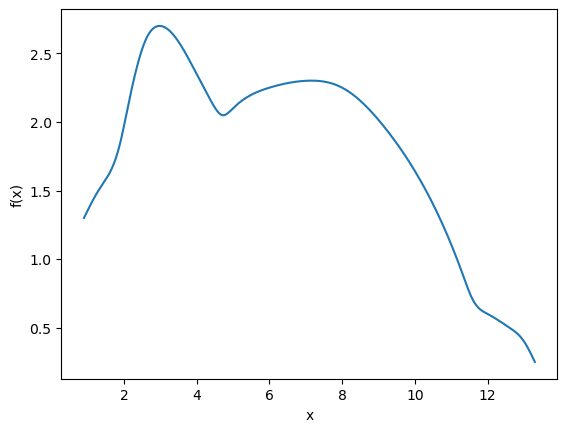

"\nLa función CubicSpline(x, y, bc_type='natural') crea una interpolación suave entre los puntos dados usando polinomios cúbicos por tramos. Es parte de scipy.interpolate.\n\n🔹 Parámetros de entrada:\nx: array con los valores del eje independiente (ordenados).\n\ny: array con los valores del eje dependiente (función evaluada en cada x).\n\nbc_type: define las condiciones de frontera.\n\n'natural' (por defecto): la segunda derivada es cero en los extremos.\n\n'clamped': se dan derivadas en los extremos.\n\n🔹 Resultado:\nDevuelve un objeto tipo función, que:\n\nPodés usar como spline(valor) para obtener f(valor).\n\nTambién podés evaluar derivadas: spline(valor, nu=1) para la primera derivada, nu=2 para la segunda, etc.\n"

In [81]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0,
              8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1,
              2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])
spline = CubicSpline(x, y,bc_type='natural')
x_fino = np.linspace(min(x), max(x), 500)
y_fino = spline(x_fino)


plt.plot(x_fino, y_fino, '-', label='Spline cúbico')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()
"""
La función CubicSpline(x, y, bc_type='natural') crea una interpolación suave entre los puntos dados usando polinomios cúbicos por tramos. Es parte de scipy.interpolate.

🔹 Parámetros de entrada:
x: array con los valores del eje independiente (ordenados).

y: array con los valores del eje dependiente (función evaluada en cada x).

bc_type: define las condiciones de frontera.

'natural' (por defecto): la segunda derivada es cero en los extremos.

'clamped': se dan derivadas en los extremos.

🔹 Resultado:
Devuelve un objeto tipo función, que:

Podés usar como spline(valor) para obtener f(valor).

También podés evaluar derivadas: spline(valor, nu=1) para la primera derivada, nu=2 para la segunda, etc.
"""
